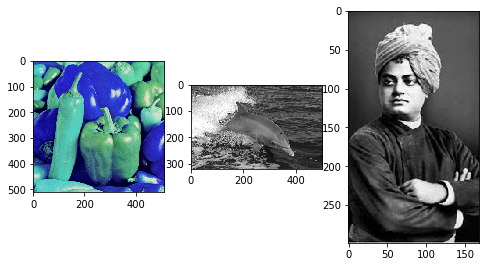

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

'''
Class Demo: Images as Functions
'''


img1 = cv2.imread('input/peppers.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('input/dolphin.png', cv2.IMREAD_COLOR)
img3 = cv2.imread('input/vivek.jpeg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')
plt.show()


In [18]:

print(img2.size)
print(img2.shape)
print(img2.dtype)


480000
(320, 500, 3)
uint8


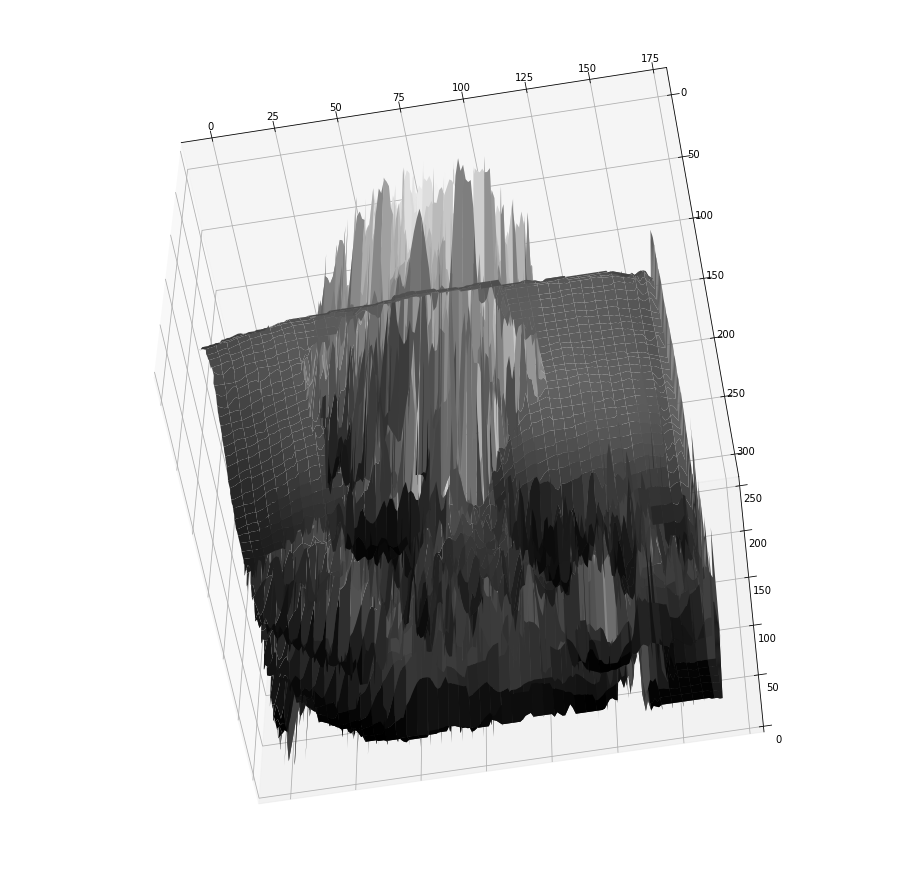

In [36]:
# for the surface map
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(16, 16))
ax = plt.axes(projection='3d')
y = range( img3.shape[0] )
x = range( img3.shape[1] ) 
X, Y = np.meshgrid(x, y)
ax.plot_surface( X, Y, img3[:,:], cmap=plt.cm.gray,
        linewidth=0) 
ax.view_init(azim=-80, elev=-60)
plt.show()

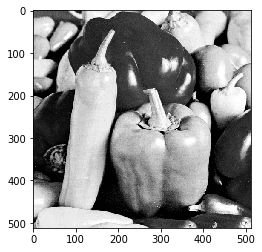

In [20]:
plt.imshow(img1[:,:,1],cmap='gray')
plt.show()


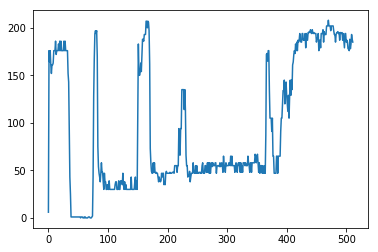

In [21]:
plt.plot(img1[100,:,1])
plt.show()

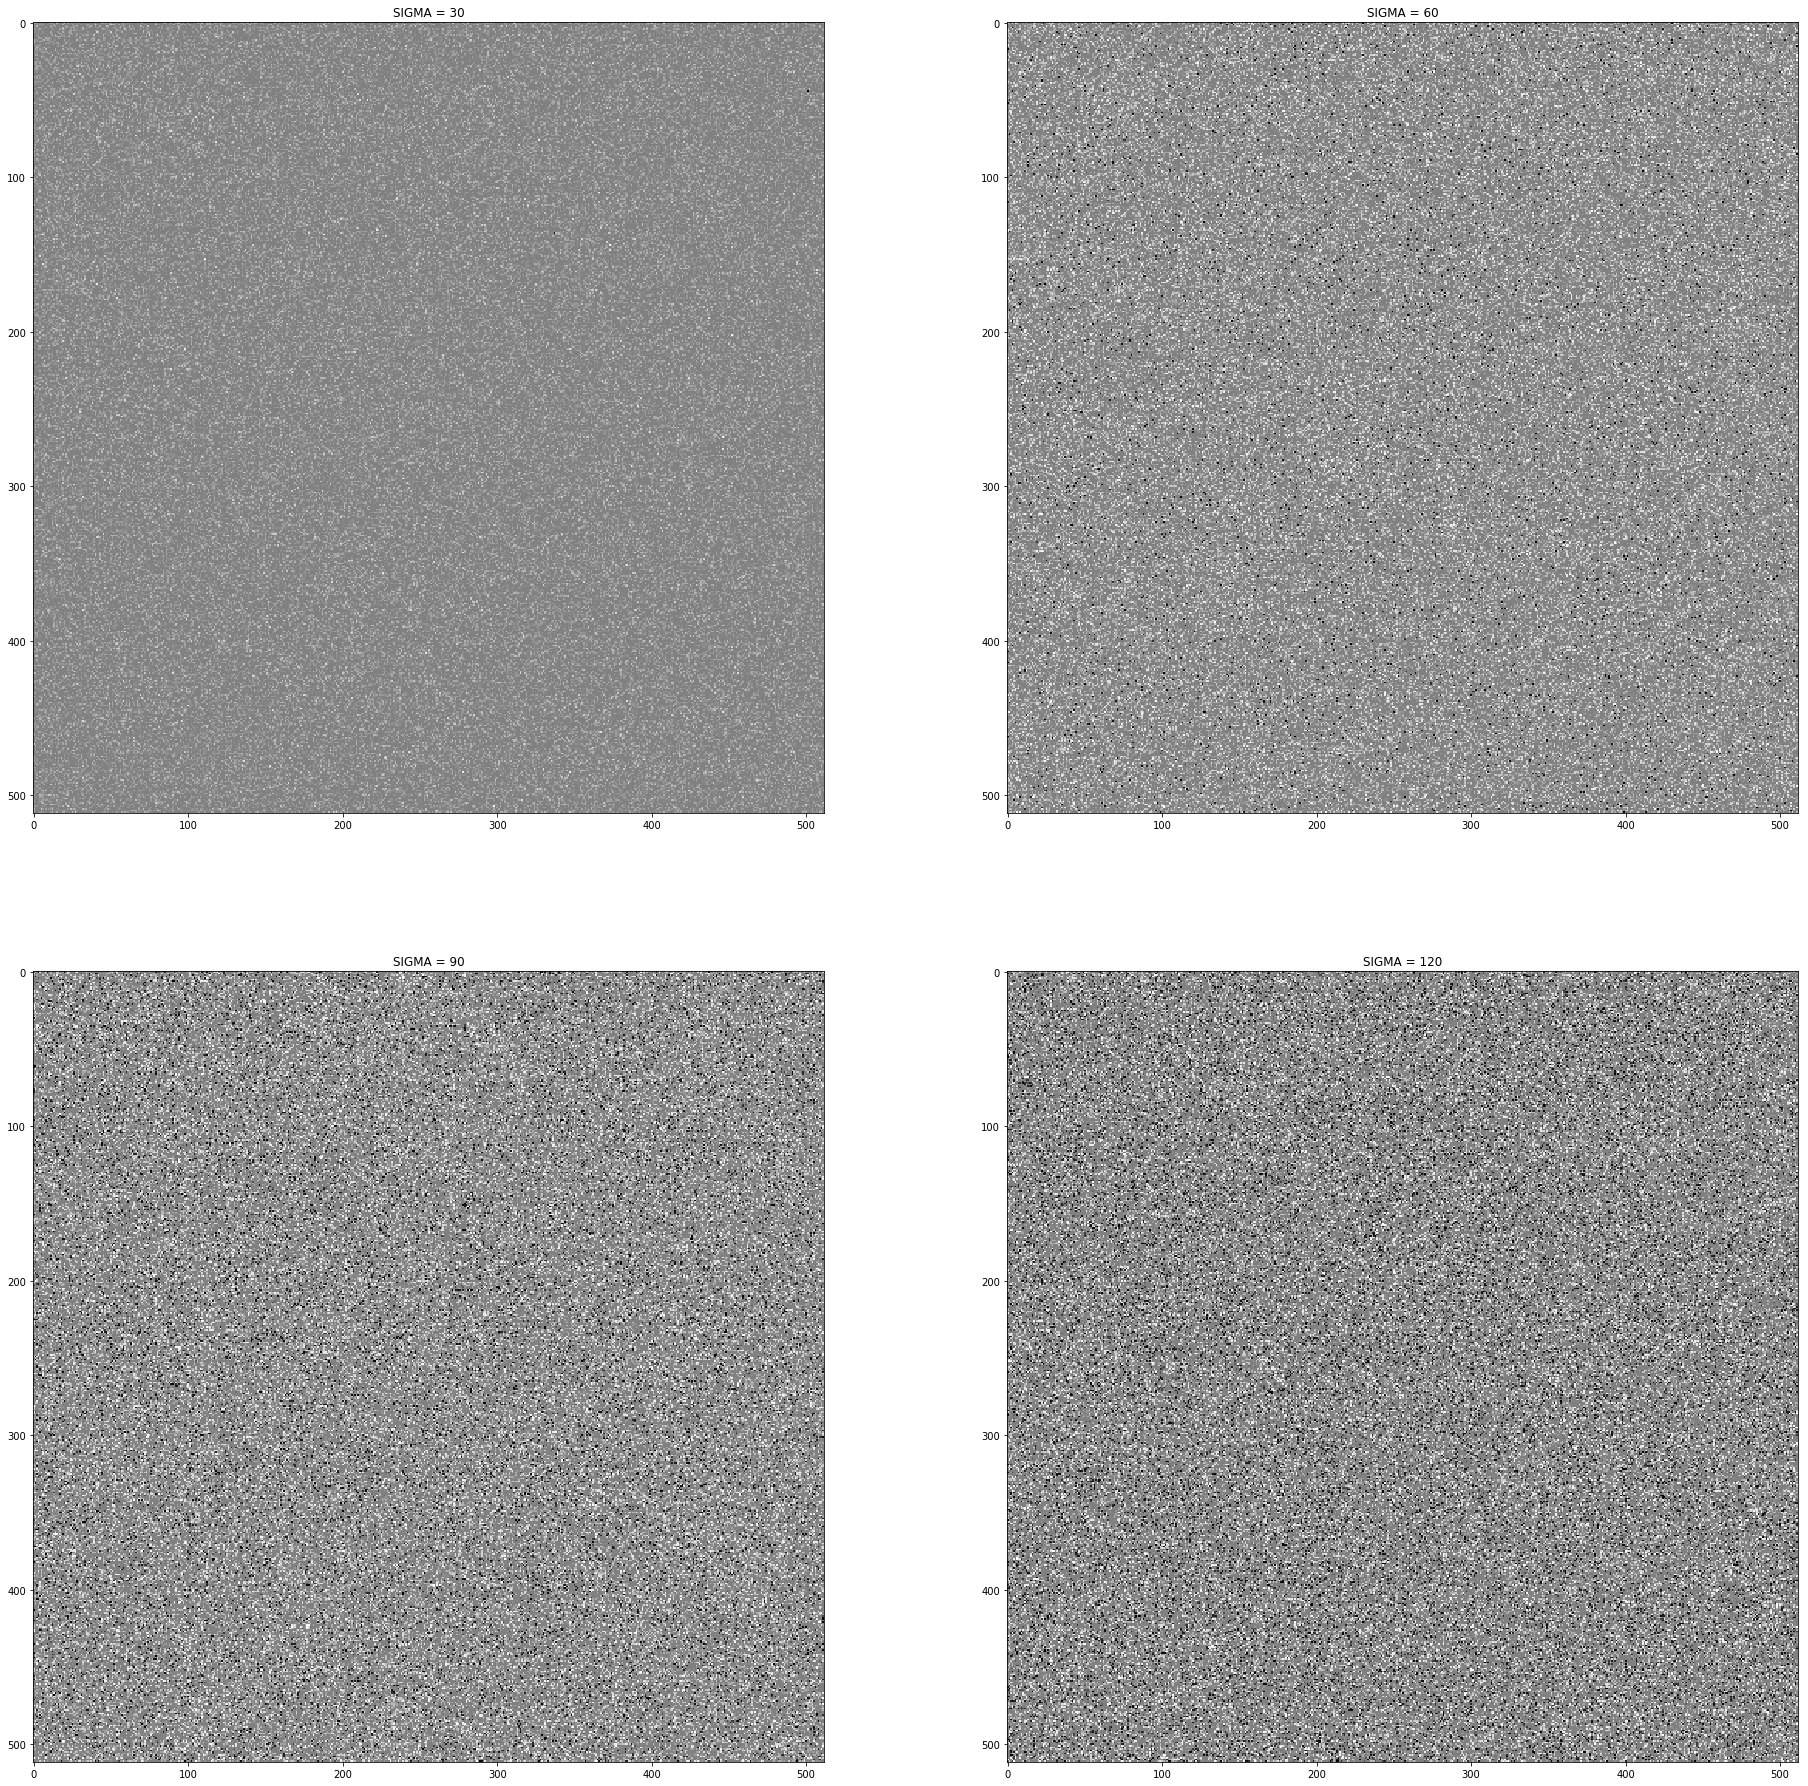

In [22]:
imgGreen = img1[:,:,1]
height, width = imgGreen.shape
    
noise = np.zeros((height,width), np.uint8)
noise2 = np.zeros((height,width), np.uint8)
noise3 = np.zeros((height,width), np.uint8)
noise4 = np.zeros((height,width), np.uint8)


cv2.randn(noise, 0, 30)
cv2.randn(noise2, 0, 60)
cv2.randn(noise3, 0, 90)
cv2.randn(noise4, 0, 120)



plt.figure(figsize=(32, 32))

plt.subplot(2, 2, 1)
plt.imshow(noise + 128,cmap='gray')
plt.title('SIGMA = 30')

plt.subplot(2, 2, 2)
plt.imshow(noise2 + 128 ,cmap='gray')
plt.title('SIGMA = 60')

plt.subplot(2, 2, 3)
plt.imshow(noise3 + 128 ,cmap='gray')
plt.title('SIGMA = 90')

plt.subplot(2, 2, 4)
plt.imshow(noise4 + 128 ,cmap='gray')
plt.title('SIGMA = 120')

plt.show()





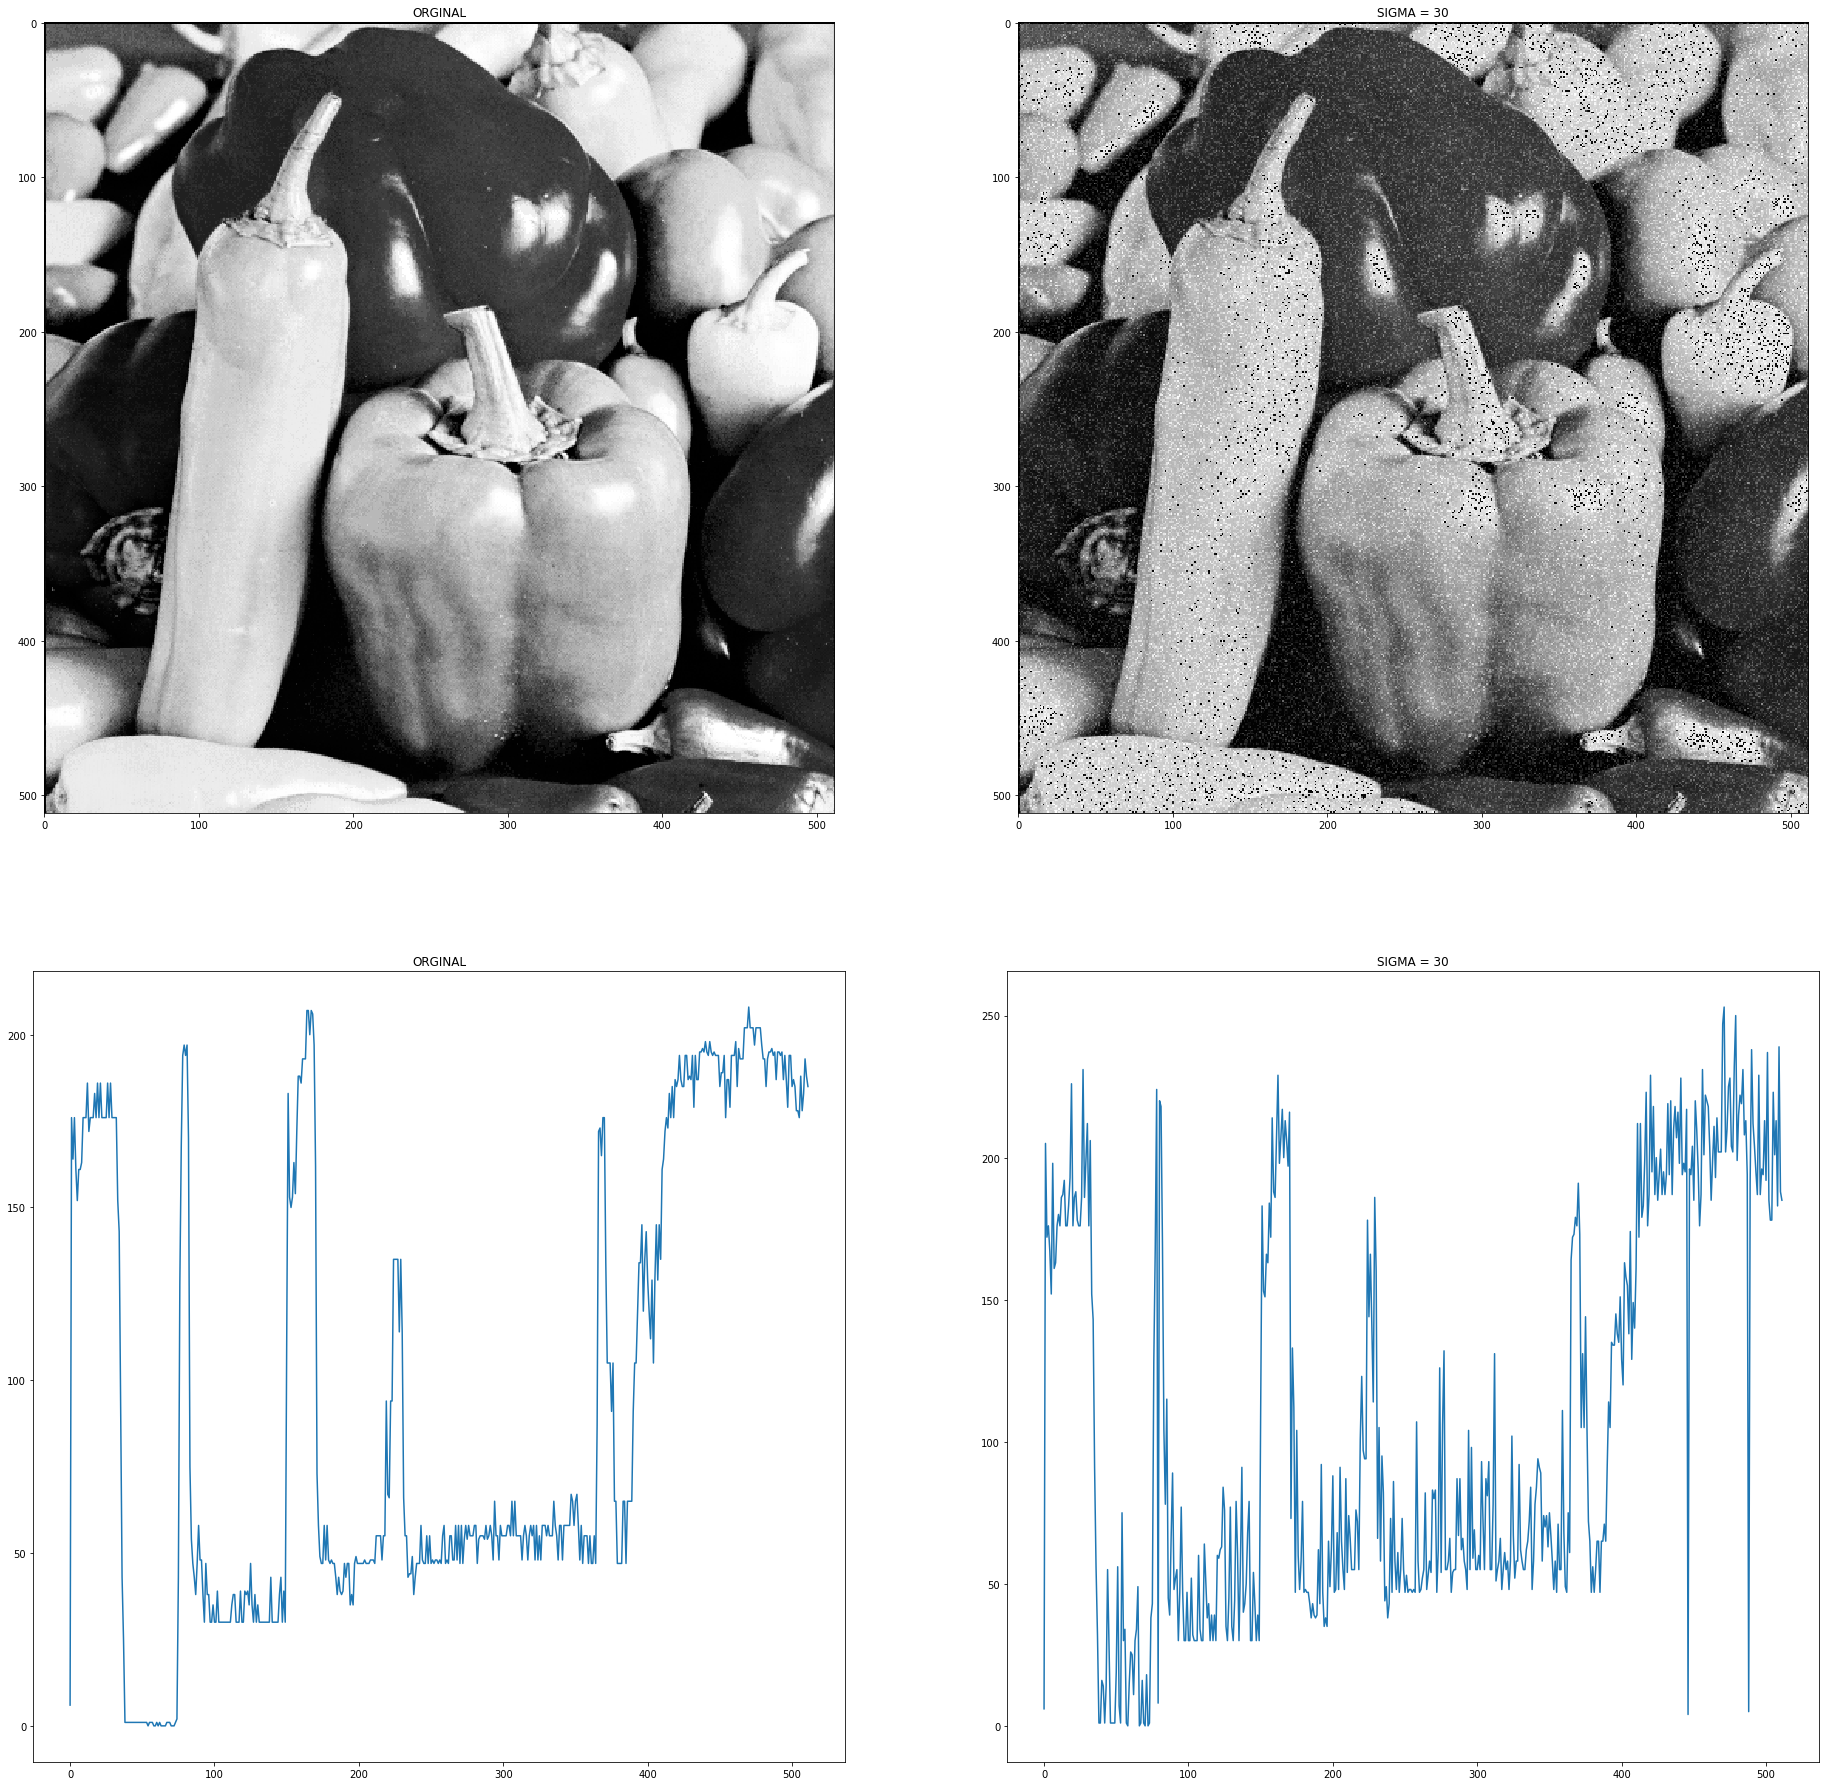

In [23]:
imgGreen = img1[:,:,1]
height, width = imgGreen.shape
    
noise = np.zeros((height,width), np.uint8)
noise2 = np.zeros((height,width), np.uint8)
noise3 = np.zeros((height,width), np.uint8)


# Meaning: cv2.randn(dst, mean, stddev)
cv2.randn(noise, 0, 30)
cv2.randn(noise2, 0, 60)
cv2.randn(noise3, 0, 90)
imgGreenNoise1 = imgGreen + noise


plt.figure(figsize=(32, 32))

plt.subplot(2, 2, 1)
plt.imshow(imgGreen,cmap='gray')
plt.title('ORGINAL')

plt.subplot(2, 2, 2)
plt.imshow(imgGreenNoise1,cmap='gray')
plt.title('SIGMA = 30')

plt.subplot(2, 2, 3)
plt.plot(img1[100,:,1])
plt.title('ORGINAL')

plt.subplot(2, 2, 4)
plt.plot(imgGreenNoise1[100,:])
plt.title('SIGMA = 30')

plt.show()

160000
(320, 500)
uint8
160000
(320, 500)
uint8


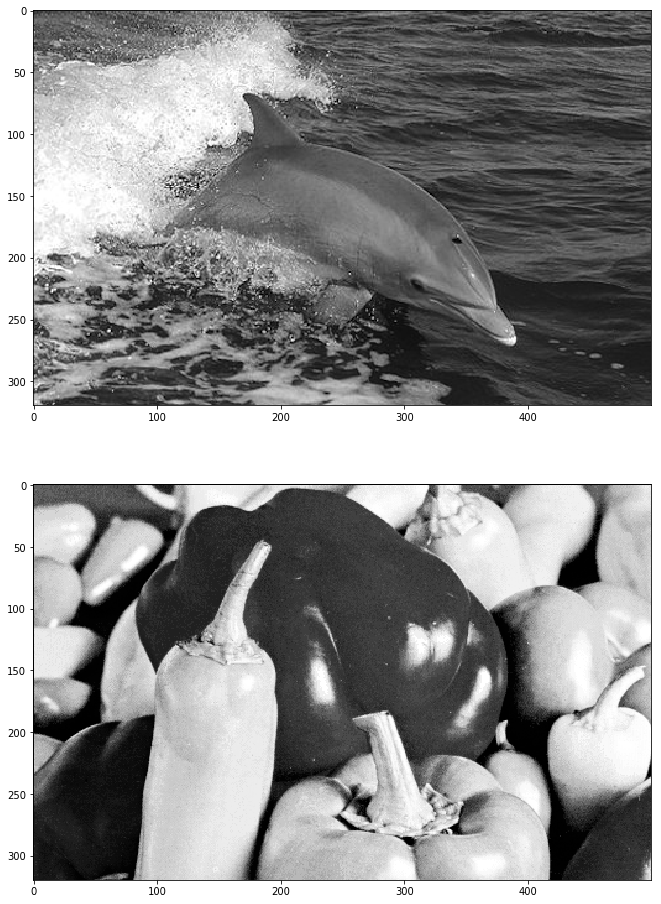

In [24]:
img2Green = img2[:,:,1]
print(img2Green.size)
print(img2Green.shape)
print(img2Green.dtype)

img1Greencrop = img1[:320,:500,1]

print(img1Greencrop.size)
print(img1Greencrop.shape)
print(img1Greencrop.dtype)

plt.figure(figsize=(16, 16))

plt.subplot(2,1, 1)
plt.imshow(img2Green, cmap='gray')


plt.subplot(2,1, 2)
plt.imshow(img1Greencrop, cmap='gray')


plt.show()


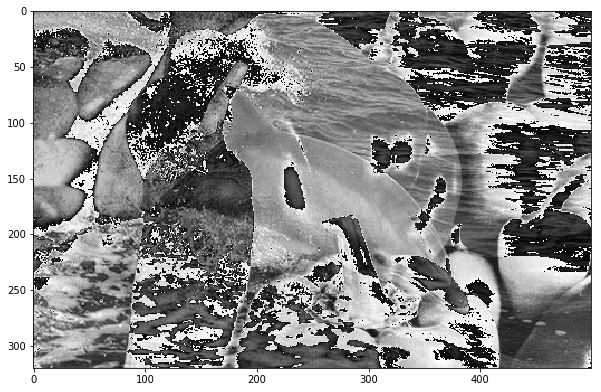

In [25]:
SumImage = img2Green + img1Greencrop
plt.figure(figsize=(10, 10))

plt.imshow(SumImage, cmap='gray')
plt.show()

# Open CV's Add function handles overflow! So, use it whenever you can  

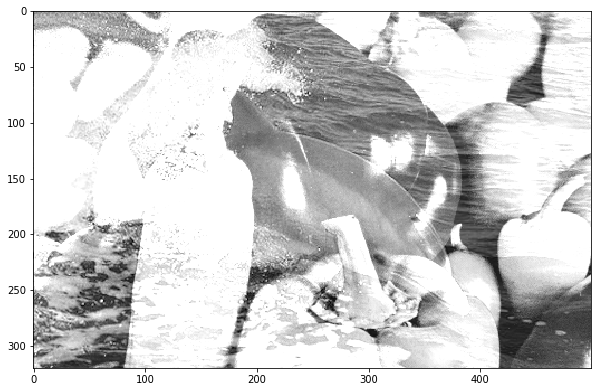

In [26]:
SumImageCV = cv2.add(img2Green,img1Greencrop)
plt.figure(figsize=(10, 10))

plt.imshow(SumImageCV, cmap='gray')
plt.show()

# The correct way to do  (Making the total weight 1... Remember, Normalizing!)

float64


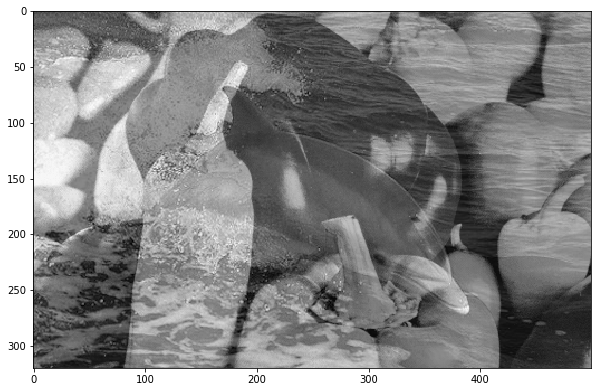

In [40]:
SumImage2 = cv2.add(img2Green / 2 , img1Greencrop / 2)
print(SumImage2.dtype)
plt.figure(figsize=(10, 10))

plt.imshow(SumImage2, cmap='gray')
plt.show()

This is called Blending. We will come back to this later. 

Dividing the image by a scaler value  

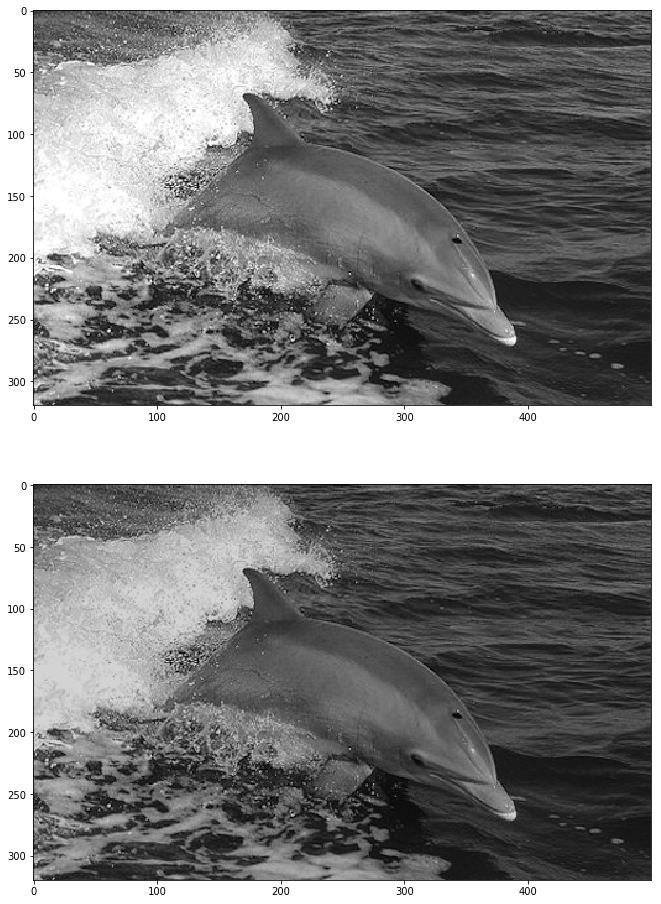

212


In [41]:
Img2GreenHalfIntensity = img2Green / 1.2
Img2GreenHalfIntensity = Img2GreenHalfIntensity.astype('uint8')


plt.figure(figsize=(16, 16))
plt.subplot(2,1, 1)
plt.imshow(img2Green, cmap='gray')


plt.subplot(2,1, 2)


# Normalize is reqired for plt to understand the max value possible is 255, not 127
plt.imshow(Img2GreenHalfIntensity, cmap='gray', norm = plt.Normalize(vmax=255))
plt.show()


print(Img2GreenHalfIntensity.max())







Result: Dividing by a value larger than 1 casues image to be darker (Lightness)

In [ ]:
# Mulitplying the image by a scaler

510.0
255.0


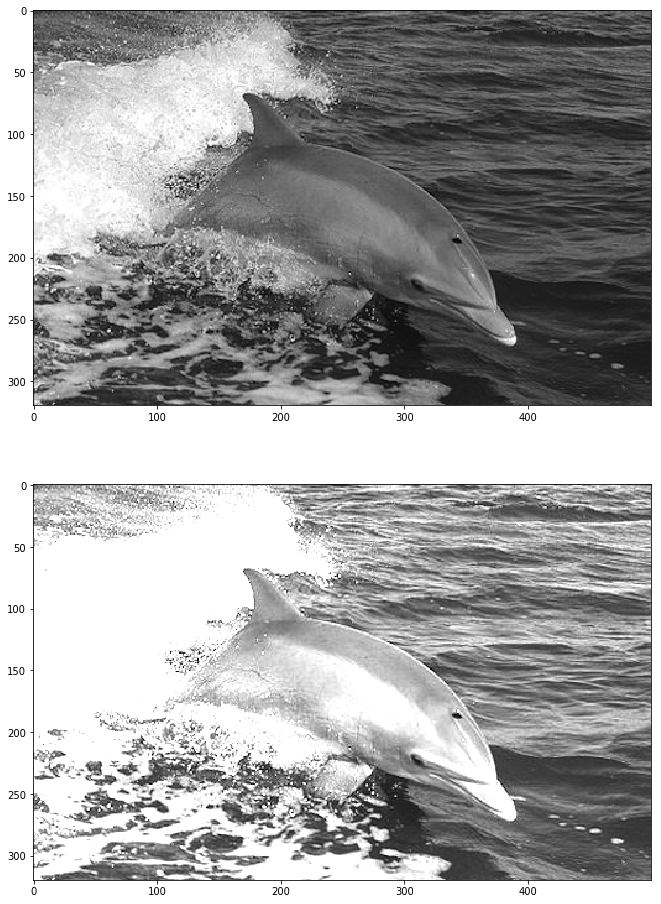

73
146


In [30]:

Img2GreenDoubleIntensity = np.asarray( img2Green, dtype=np.float32)
Img2GreenDoubleIntensity = Img2GreenDoubleIntensity * 2
print(Img2GreenDoubleIntensity.max())

# Make sure values lies between 0 and 255
np.clip(Img2GreenDoubleIntensity, 0, 255, out=Img2GreenDoubleIntensity) 
print(Img2GreenDoubleIntensity.max())

Img2GreenDoubleIntensity = Img2GreenDoubleIntensity.astype('uint8')


plt.figure(figsize=(16, 16))

plt.subplot(2,1, 1)
plt.imshow(img2Green, cmap='gray')


plt.subplot(2,1, 2)
plt.imshow(Img2GreenDoubleIntensity, cmap='gray')


plt.show()
print(img2Green[0,0])
print(Img2GreenDoubleIntensity[0,0])

Result: Multiplying with a scaler increased intensity. Usually, refered as increasing brightness

# Write a method for scaling

In [31]:
def scaling(x, multiplier):
    xScaledIntensity = np.asarray( x, dtype=np.float32)
    xScaledIntensity = xScaledIntensity * multiplier
    np.clip(xScaledIntensity, 0, 255, out=xScaledIntensity)
    xScaledIntensity = xScaledIntensity.astype('uint8')
    return xScaledIntensity


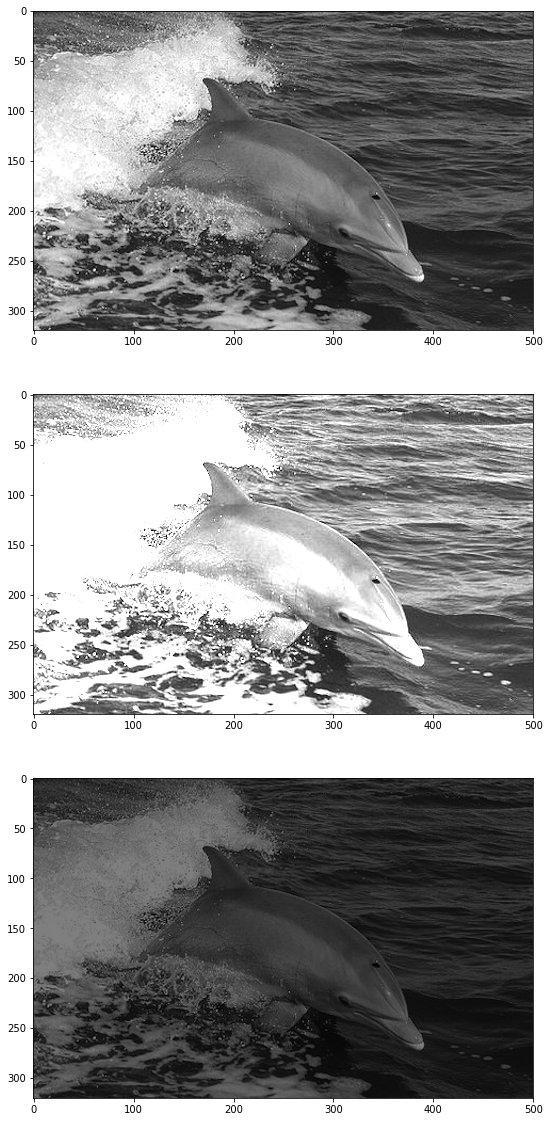

In [32]:
Img2GreenDoubleIntensity = scaling(img2Green, 2)
Img2GreenHalfIntensity = scaling(img2Green, 0.5)


plt.figure(figsize=(20, 20))
plt.subplot(3,1, 1)
plt.imshow(img2Green, cmap='gray', norm = plt.Normalize(vmax=255))


plt.subplot(3,1, 2)
plt.imshow(Img2GreenDoubleIntensity, cmap='gray', norm = plt.Normalize(vmax=255))


plt.subplot(3,1, 3)
plt.imshow(Img2GreenHalfIntensity, cmap='gray', norm = plt.Normalize(vmax=255))

plt.show()






Revisiting the blending operation

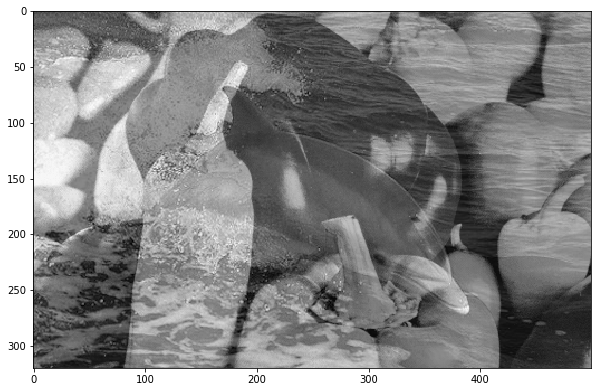

In [33]:
SumImage2 = img2Green / 2.0 + img1Greencrop / 2.0
plt.figure(figsize=(10, 10))

plt.imshow(SumImage2, cmap='gray')
plt.show()

An interesting  operator is the linear blend operator:
$$g(x)=\alpha f_0(x)+\beta f_1(x) + \gamma$$

By varying $\alpha$ from $0 \rightarrow 1$ this operator can be used to perform a temporal cross-dissolve between two images or videos, as seen in slide shows and film productions (cool, eh?)

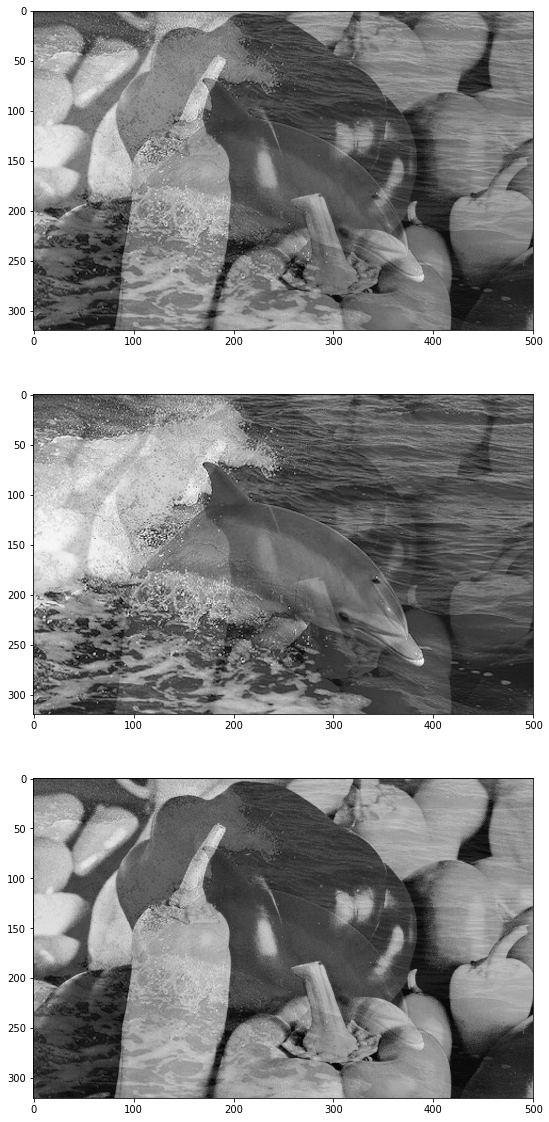

In [34]:


Img50_50 = cv2.addWeighted(img2Green, .5, img1Greencrop, .5, 0.0)
Img80_20 = cv2.addWeighted(img2Green, .8, img1Greencrop, .2, 0.0)
Img30_70 = cv2.addWeighted(img2Green, .3, img1Greencrop, .7, 0.0)



plt.figure(figsize=(20, 20))
plt.subplot(3,1, 1)
plt.imshow(Img50_50, cmap='gray', norm = plt.Normalize(vmax=255))


plt.subplot(3,1, 2)
plt.imshow(Img80_20, cmap='gray', norm = plt.Normalize(vmax=255))


plt.subplot(3,1, 3)
plt.imshow(Img30_70, cmap='gray', norm = plt.Normalize(vmax=255))

plt.show()
